In [2]:
!pip install pandas
!pip install matplotlib

  Using cached pandas-2.2.2-cp39-cp39-macosx_11_0_arm64.whl (11.3 MB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
You should consider upgrading via the '/Users/jamesli/Documents/Georgia Tech/Courses/VIP/notebooks/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/jamesli/Documents/Georgia Tech/Courses/VIP/notebooks/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!pip install scipy

     |████████████████████████████████| 30.3 MB 11.8 MB/s eta 0:00:01     |███████████████████████████▉    | 26.3 MB 11.8 MB/s eta 0:00:01
You should consider upgrading via the '/Users/jamesli/Documents/Georgia Tech/Courses/VIP/notebooks/bin/python3 -m pip install --upgrade pip' command.


In [6]:
!pip install sklearn

    ERROR: Command errored out with exit status 1:
     command: '/Users/jamesli/Documents/Georgia Tech/Courses/VIP/notebooks/bin/python3' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/rg/k9cc62j96fg9431qm98ztwt40000gn/T/pip-install-ifq5xq6f/sklearn_0233be1ef3df4631ad02610af2f5e57c/setup.py'"'"'; __file__='"'"'/private/var/folders/rg/k9cc62j96fg9431qm98ztwt40000gn/T/pip-install-ifq5xq6f/sklearn_0233be1ef3df4631ad02610af2f5e57c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/rg/k9cc62j96fg9431qm98ztwt40000gn/T/pip-pip-egg-info-dw058k9x
         cwd: /private/var/folders/rg/k9cc62j96fg9431qm98ztwt40000gn/T/pip-install-ifq5xq6f/sklearn_0233be1ef3df4631ad02610af2f5e57c/
    Complete output

In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.9.6 (default, Feb  3 2024, 15:58:27) 
[Clang 15.0.0 (clang-1500.3.9.4)]
pandas version: 2.2.2
matplotlib version: 3.9.2
NumPy version: 2.0.1
SciPy version: 1.13.1
IPython version: 8.18.1
scikit-learn version: 1.5.2
-------------------------


In [3]:
!pip install seaborn

     |████████████████████████████████| 294 kB 3.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/jamesli/Documents/Georgia Tech/Courses/VIP/notebooks/bin/python3 -m pip install --upgrade pip' command.


In [4]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [6]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

# By using a list w/ references, we can clean both datasets at once
data_cleaner = [train_data, test_data]

#preview data
print (train_data.info()) 
train_data.head()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print('Train columns with null values:\n', train_data.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_data.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [8]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    #delete the cabin feature/column and others previously stated to exclude in train dataset
    drop_column = ['Cabin', 'Ticket', 'Name']
    dataset.drop(drop_column, axis=1, inplace = True)
    dataset.set_index(keys=['PassengerId'], drop=True, inplace=True)

print(train_data.isnull().sum())
print("-"*10)
print(test_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [9]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

#preview data again
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,0
2,1,1,female,38.0,1,0,71.2833,C,2,0
3,1,3,female,26.0,0,0,7.9250,S,1,1
4,1,1,female,35.0,1,0,53.1000,S,2,0
5,0,3,male,35.0,0,0,8.0500,S,1,1


In [10]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])

    columns_map = {'Sex': {'male': 0, 'female': 1}}
    dataset.replace(columns_map, inplace=True)


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data_x = ['Sex','Pclass', 'Embarked','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data_xy =  Target + data_x

#encode embarking location to categories
train_data = pd.get_dummies(train_data[data_xy])
test_data = pd.get_dummies(test_data[data_x])


In [11]:
train_data.head()

,Survived,Sex,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,0,3,1,0,22.0,7.2500,2,0,False,False,True
2,1,1,1,1,0,38.0,71.2833,2,0,True,False,False
3,1,1,3,0,0,26.0,7.9250,1,1,False,False,True
4,1,1,1,1,0,35.0,53.1000,2,0,False,False,True
5,0,0,3,0,0,35.0,8.0500,1,1,False,False,True


In [12]:
test_data.head()

,Sex,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
892,0,3,0,0,34.5,7.8292,1,1,False,True,False
893,1,3,1,0,47.0,7.0000,2,0,False,False,True
894,0,2,0,0,62.0,9.6875,1,1,False,True,False
895,0,3,0,0,27.0,8.6625,1,1,False,False,True
896,1,3,1,1,22.0,12.2875,3,0,False,False,True


In [13]:
print('Train columns with null values: \n', train_data.isnull().sum())
print("-"*10)
print (train_data.info())
print("-"*10)

print('Test/Validation columns with null values: \n', train_data.isnull().sum())
print("-"*10)
print (train_data.info())
print("-"*10)

train_data.describe(include = 'all')

Train columns with null values: 
 Survived      0
Sex           0
Pclass        0
SibSp         0
Parch         0
Age           0
Fare          0
FamilySize    0
IsAlone       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Age         891 non-null    float64
 6   Fare        891 non-null    float64
 7   FamilySize  891 non-null    int64  
 8   IsAlone     891 non-null    int64  
 9   Embarked_C  891 non-null    bool   
 10  Embarked_Q  891 non-null    bool   
 11  Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 72.2 KB
None
----------


,Survived,Sex,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,723,814,646
mean,0.383838,0.352413,2.308642,0.523008,0.381594,29.361582,32.204208,1.904602,0.602694,NaN,NaN,NaN
std,0.486592,0.477990,0.836071,1.102743,0.806057,13.019697,49.693429,1.613459,0.489615,NaN,NaN,NaN
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,1.000000,0.000000,NaN,NaN,NaN
25%,0.000000,0.000000,2.000000,0.000000,0.000000,22.000000,7.910400,1.000000,0.000000,NaN,NaN,NaN
50%,0.000000,0.000000,3.000000,0.000000,0.000000,28.000000,14.454200,1.000000,1.000000,NaN,NaN,NaN
75%,1.000000,1.000000,3.000000,1.000000,0.000000,35.000000,31.000000,2.000000,1.000000,NaN,NaN,NaN


In [14]:
x_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_train, y_train, test_size=0.33, random_state=10)

In [15]:
print(x_train.head())
print(y_train.head())
print(test_data.head())

             Sex  Pclass  SibSp  Parch   Age    Fare  FamilySize  IsAlone  \
PassengerId                                                                 
464            0       2      0      0  48.0  13.000           1        1   
160            0       3      8      2  28.0  69.550          11        0   
48             1       3      0      0  28.0   7.750           1        1   
403            1       3      1      0  21.0   9.825           2        0   
619            1       2      2      1   4.0  39.000           4        0   

             Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                      
464               False       False        True  
160               False       False        True  
48                False        True       False  
403               False       False        True  
619               False       False        True  
PassengerId
464    0
160    0
48     1
403    0
619    1
Name: Survived, dtype: int64
             Sex  Pclass

In [16]:
random.seed(0)
np.random.seed(0)

In [20]:
BgCF = ensemble.GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=300, random_state=0)
BgCF.fit(x_train.values, y_train.values)
print(BgCF.score(x_test.values, y_test.values))

y_pred = BgCF.predict(x_test.values)
y_truth = y_test.values

0.8203389830508474


In [22]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(sklearn.metrics.confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[161  30]
 [ 23  81]]

True Negatives 161
False Positives 30
False Negatives 23
True Positives 81


Confusion matrix, without normalization
[[161  30]
 [ 23  81]]


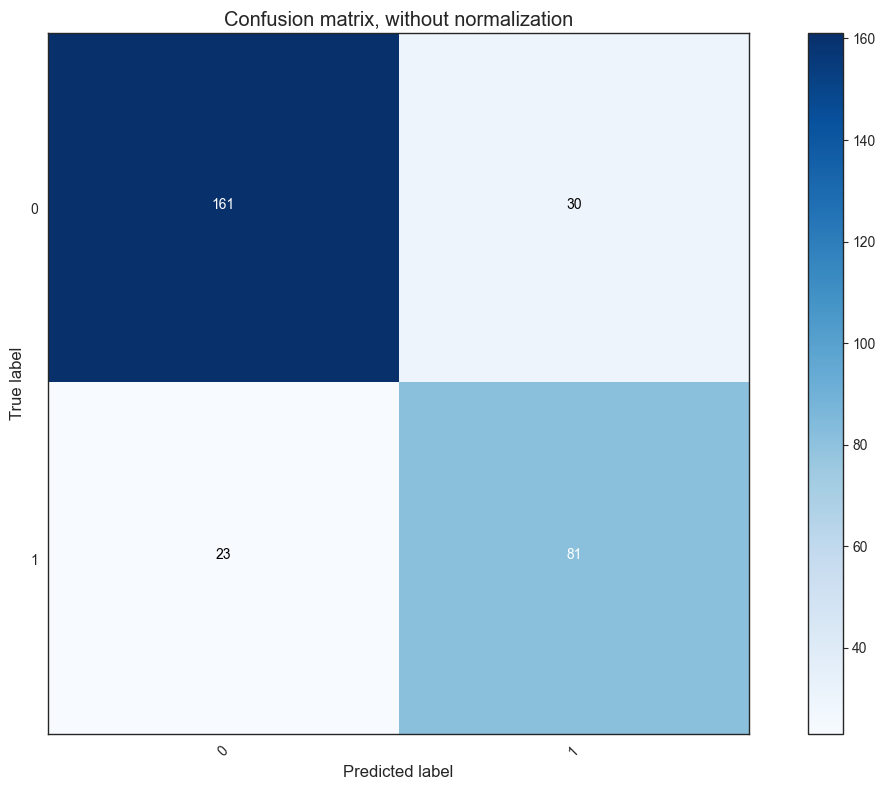

In [26]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(y_truth, y_pred)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()